In [172]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt


df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Initial Data.xlsx")

df

,id,ticketId,externalId,ticketUrl,created,customData,lang,channel,origin,companies,priority,subject,description,assigners,status,type,resolved
0,993,22314,NaN,NaN,2024-04-24T09:48:21.098Z,"{'brand': ['Mandarin_Oriental_Hotel_Group'], '...",en,web,jira,"[{'type': 'account', 'data': '35'}]",medium,SUP-1205 | Data not available - Glowing,"<p>Good day Glowing Team, </p>\n\n\n\n<p>Sinc...","[{'type': 'admin', 'data': '7'}]",open,problem,2024-04-30T11:53:18.796Z
1,1003,22336,NaN,NaN,2024-04-27T01:33:24.639Z,"{'brand': ['Mandarin_Oriental_Hotel_Group'], '...",en,web,jira,"[{'type': 'account', 'data': '42'}]",medium,SUP-1214 | Urgent Please : Message Lost,<p>Dear Support Team </p>\n\n\n\n<p>Please urg...,"[{'type': 'admin', 'data': '7'}]",open,problem,2024-04-30T11:11:52.781Z
2,990,22312,NaN,NaN,2024-04-23T21:33:20.099Z,"{'brand': ['Rosewood_Hotels'], 'breached': Tru...",en,web,jira,"[{'type': 'account', 'data': '41'}]",medium,SUP-1204 | Glowing Failed,"<p>Hello team, </p>\n\n\n\n<p>Please see below...","[{'type': 'admin', 'data': '7'}]",open,problem,2024-04-30T10:43:27.350Z
3,971,22259,NaN,NaN,2024-04-16T02:26:18.731Z,"{'brand': ['Rosewood_Hotels'], 'breached': Fal...",en,web,jira,"[{'type': 'account', 'data': '62'}]",medium,SUP-1180 | Failed Messages,"<p><font color=""#172B4D"">Dear Team,</font> <fo...","[{'type': 'admin', 'data': '7'}]",open,problem,2024-04-30T10:38:14.509Z
4,1008,22362,NaN,NaN,2024-04-30T09:09:36.499Z,"{'brand': ['Rosewood_Hotels'], 'breached': Fal...",en,web,jira,"[{'type': 'account', 'data': '6'}]",medium,SUP-1220 | Why cannot send some message when o...,<div class='table-wrap'>\n<table class='conflu...,"[{'type': 'admin', 'data': '7'}]",open,problem,2024-04-30T09:47:57.662Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1457,135477,135477.0,https://app.intercom.com/a/inbox/fzbshzfq/inbo...,2024-02-22T11:51:40.000Z,NaN,en,web,intercom,"[{'type': 'account', 'data': '16'}]",low,NaN,<p>level</p>,"[{'type': 'admin', 'data': '7'}]",closed,question,2024-02-28T17:15:30.000Z
753,1470,135755,135755.0,https://app.intercom.com/a/inbox/fzbshzfq/inbo...,2024-02-28T15:50:27.000Z,NaN,en,web,intercom,"[{'type': 'account', 'data': '19'}]",medium,NaN,<p>potential bug</p>,"[{'type': 'admin', 'data': '7'}]",closed,problem,2024-02-28T16:03:23.000Z
754,1469,135652,135652.0,https://app.intercom.com/a/inbox/fzbshzfq/inbo...,2024-02-27T13:14:59.000Z,NaN,en,web,intercom,"[{'type': 'account', 'data': '62'}]",low,NaN,<p>we have the feeling that the whole integrat...,"[{'type': 'admin', 'data': '7'}]",closed,problem,2024-02-28T14:10:30.000Z
755,1010,126908,126908.0,https://app.intercom.com/a/inbox/fzbshzfq/inbo...,2024-01-11T11:01:42.000Z,NaN,NaN,web,intercom,"[{'type': 'account', 'data': '52'}]",medium,NaN,"<p>Hey, there's a few cases where the original...","[{'type': 'admin', 'data': '7'}]",closed,problem,2024-02-28T11:15:52.000Z


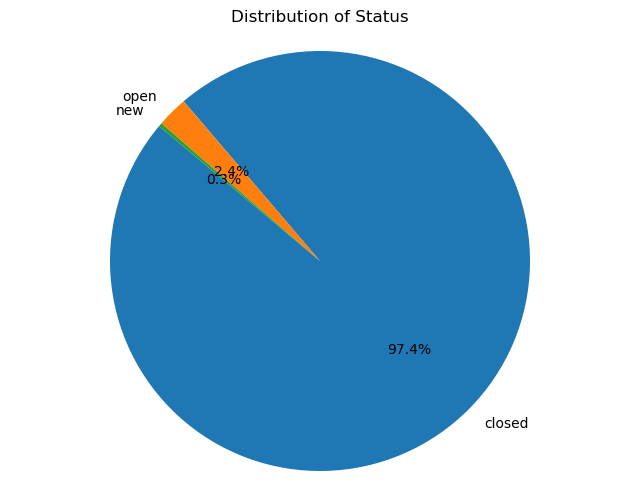

In [181]:
# Data Visualization

# Count the occurrences of each priority
priority_counts = df['status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Save the pie chart as an image file
plt.savefig('D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Visualizations\\priority_distribution.png')

# Show the pie chart
plt.show()

In [184]:
company_counts =  df['companies'].nunique()
company_counts

55

In [124]:
df = df.drop_duplicates()
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,Unnamed: 36,Unnamed: 37
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,0.0
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,?,?,?,?,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53,NaN,NaN
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN


In [125]:
df = df.drop(["sys_mod_count"], axis=1)
df

,number,incident_state,active,reassignment_count,reopen_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,...,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,Unnamed: 36,Unnamed: 37
0,INC0000045,New,True,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
1,INC0000045,Resolved,True,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
2,INC0000045,Resolved,True,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,0.0
3,INC0000045,Closed,False,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
4,INC0000047,New,True,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,?,?,?,?,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,True,Caller 116,Opened by 12,16/2/2017 09:09,?,...,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53,NaN,NaN
141708,INC0121064,Active,True,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,?,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141709,INC0121064,Active,True,1,0,True,Caller 116,Opened by 12,16/2/2017 14:17,?,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141710,INC0121064,Resolved,True,1,0,True,Caller 116,Opened by 12,16/2/2017 14:17,?,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN


In [126]:
df = df.drop(["caller_id","sys_created_by","sys_created_at", "sys_updated_by","sys_updated_at", "location","cmdb_ci","u_symptom","subcategory","category","caused_by",
              "vendor","rfc","problem_id","notify","assigned_to","assignment_group"], axis=1)
df

,number,incident_state,active,reassignment_count,reopen_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at,Unnamed: 36,Unnamed: 37
0,INC0000045,New,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
1,INC0000045,Resolved,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
2,INC0000045,Resolved,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,0.0
3,INC0000045,Closed,False,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
4,INC0000047,New,True,0,0,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53,NaN,NaN
141708,INC0121064,Active,True,0,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141709,INC0121064,Active,True,1,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141710,INC0121064,Resolved,True,1,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN


In [127]:
df = df.drop(["Unnamed: 36"], axis=1)
df

,number,incident_state,active,reassignment_count,reopen_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at,Unnamed: 37
0,INC0000045,New,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN
1,INC0000045,Resolved,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN
2,INC0000045,Resolved,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,0.0
3,INC0000045,Closed,False,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN
4,INC0000047,New,True,0,0,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53,NaN
141708,INC0121064,Active,True,0,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN
141709,INC0121064,Active,True,1,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN
141710,INC0121064,Resolved,True,1,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN


In [128]:
df = df.drop(["Unnamed: 37"], axis=1)
df

,number,incident_state,active,reassignment_count,reopen_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [129]:
correct_state = 'Closed'
df_new = df.drop(df[df['incident_state'] != correct_state].index)
df_new

,number,incident_state,active,reassignment_count,reopen_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
3,INC0000045,Closed,False,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,1,0,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,0,True,Opened by 8,29/2/2016 06:10,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 10,Resolved by 5,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,0,True,Opened by 180,29/2/2016 06:38,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 3,Resolved by 113,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,1,0,False,Opened by 180,29/2/2016 06:58,Phone,1 - High,2 - Medium,2 - High,True,False,code 7,Resolved by 62,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,0,True,Opened by 8,15/2/2017 02:02,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 6,Resolved by 5,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,0,True,Opened by 508,15/2/2017 07:09,IVR,3 - Low,2 - Medium,4 - Low,False,False,code 6,?,?,15/2/2017 07:09
141703,INC0120495,Closed,False,1,0,True,Opened by 14,15/2/2017 11:58,Phone,2 - Medium,2 - Medium,3 - Moderate,False,False,?,?,?,16/2/2017 09:51
141707,INC0120835,Closed,False,1,0,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53


In [130]:
df

,number,incident_state,active,reassignment_count,reopen_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [131]:
df = pd.read_csv("D:\\Private\\University\\Research\\Data Sets\\incident_event_log.csv")
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,Unnamed: 36,Unnamed: 37
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,0.0
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,?,?,?,?,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53,NaN,NaN
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN


In [132]:
df = df.drop_duplicates()
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,Unnamed: 36,Unnamed: 37
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,0.0
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,?,?,?,?,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53,NaN,NaN
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN


In [133]:
df = df.drop(["caller_id","sys_created_by","sys_created_at", "sys_updated_by","sys_updated_at", "location","cmdb_ci","u_symptom","subcategory","category","caused_by",
              "vendor","rfc","problem_id","notify","assigned_to","assignment_group","reassignment_count"], axis=1)
df

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at,Unnamed: 36,Unnamed: 37
0,INC0000045,New,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
1,INC0000045,Resolved,True,0,2,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
2,INC0000045,Resolved,True,0,3,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,0.0
3,INC0000045,Closed,False,0,4,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
4,INC0000047,New,True,0,0,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,0,4,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53,NaN,NaN
141708,INC0121064,Active,True,0,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141709,INC0121064,Active,True,0,1,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141710,INC0121064,Resolved,True,0,2,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN


In [134]:
df = df.drop(["Unnamed: 36","Unnamed: 37"], axis=1)
df

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,2,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,3,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,4,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,0,4,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,0,1,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,0,2,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [135]:
df = df.drop(["closed_code","resolved_by"], axis=1)
df

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
0,INC0000045,New,True,0,0,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,2,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,3,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,4,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 9:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,0,4,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,0,1,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,0,2,True,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 16:38,16/2/2017 16:38


In [136]:
correct_state = 'Closed'
df_new = df.drop(df[df['incident_state'] != correct_state].index)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,Opened by 8,29/2/2016 06:10,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,Opened by 180,29/2/2016 06:38,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,Opened by 180,29/2/2016 06:58,Phone,1 - High,2 - Medium,2 - High,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,Opened by 8,15/2/2017 02:02,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,Opened by 508,15/2/2017 07:09,IVR,3 - Low,2 - Medium,4 - Low,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,Opened by 14,15/2/2017 11:58,Phone,2 - Medium,2 - Medium,3 - Moderate,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 09:53,16/2/2017 09:53


In [137]:
df_no_nan = df_new.dropna()
df_no_nan

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,Opened by 8,29/2/2016 06:10,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,Opened by 180,29/2/2016 06:38,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,Opened by 180,29/2/2016 06:58,Phone,1 - High,2 - Medium,2 - High,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,Opened by 8,15/2/2017 02:02,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,Opened by 508,15/2/2017 07:09,IVR,3 - Low,2 - Medium,4 - Low,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,Opened by 14,15/2/2017 11:58,Phone,2 - Medium,2 - Medium,3 - Moderate,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 09:53,16/2/2017 09:53


In [138]:
df = pd.read_csv("D:\\Private\\University\\Research\\Data Sets\\incident_event_log.csv")
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,Unnamed: 36,Unnamed: 37
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,0.0
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,?,?,?,?,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53,NaN,NaN
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN


In [139]:
df = df.drop(["sys_created_by","sys_created_at", "sys_updated_by","sys_updated_at", "location","cmdb_ci","u_symptom","subcategory","category","caused_by",
              "vendor","rfc","problem_id","notify","assigned_to","assignment_group","reassignment_count"], axis=1)
df

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,...,urgency,priority,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at,Unnamed: 36,Unnamed: 37
0,INC0000045,New,True,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,...,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
1,INC0000045,Resolved,True,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,...,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
2,INC0000045,Resolved,True,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,...,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,0.0
3,INC0000045,Closed,False,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,...,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
4,INC0000047,New,True,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Phone,...,2 - Medium,3 - Moderate,True,False,code 5,Resolved by 81,1/3/2016 9:52,6/3/2016 10:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,Email,...,2 - Medium,3 - Moderate,False,True,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53,NaN,NaN
141708,INC0121064,Active,True,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,Email,...,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141709,INC0121064,Active,True,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,Email,...,2 - Medium,3 - Moderate,False,False,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141710,INC0121064,Resolved,True,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,Email,...,2 - Medium,3 - Moderate,False,True,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN


In [140]:
df = df.drop(["closed_code","resolved_by"], axis=1)
df

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at,Unnamed: 36,Unnamed: 37
0,INC0000045,New,True,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
1,INC0000045,Resolved,True,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
2,INC0000045,Resolved,True,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00,NaN,0.0
3,INC0000045,Closed,False,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00,NaN,NaN
4,INC0000047,New,True,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 9:52,6/3/2016 10:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 09:53,16/2/2017 09:53,NaN,NaN
141708,INC0121064,Active,True,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141709,INC0121064,Active,True,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN
141710,INC0121064,Resolved,True,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 16:38,16/2/2017 16:38,NaN,NaN


In [141]:
df = df.drop(["Unnamed: 36","Unnamed: 37"], axis=1)
df

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
0,INC0000045,New,True,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 9:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,False,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 16:38,16/2/2017 16:38


In [142]:
correct_state = 'Closed'
df_new = df.drop(df[df['incident_state'] != correct_state].index)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,Caller 2403,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,Caller 4416,Opened by 8,29/2/2016 06:10,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,Caller 4491,Opened by 180,29/2/2016 06:38,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,Caller 3765,Opened by 180,29/2/2016 06:58,Phone,1 - High,2 - Medium,2 - High,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,Caller 90,Opened by 8,15/2/2017 02:02,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,Caller 1899,Opened by 508,15/2/2017 07:09,IVR,3 - Low,2 - Medium,4 - Low,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,Caller 323,Opened by 14,15/2/2017 11:58,Phone,2 - Medium,2 - Medium,3 - Moderate,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 09:53,16/2/2017 09:53


In [143]:
df_new = df_new.dropna()
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,Caller 2403,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,Caller 4416,Opened by 8,29/2/2016 06:10,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,Caller 4491,Opened by 180,29/2/2016 06:38,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,Caller 3765,Opened by 180,29/2/2016 06:58,Phone,1 - High,2 - Medium,2 - High,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,Caller 90,Opened by 8,15/2/2017 02:02,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,Caller 1899,Opened by 508,15/2/2017 07:09,IVR,3 - Low,2 - Medium,4 - Low,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,Caller 323,Opened by 14,15/2/2017 11:58,Phone,2 - Medium,2 - Medium,3 - Moderate,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 09:53,16/2/2017 09:53


In [144]:
df_cleaned_1 = df_new["caller_id"].str.lstrip("Caller")
df_cleaned_1

3          2403
12         2403
19         4416
23         4491
31         3765
          ...  
141695       90
141697     1899
141703      323
141707      116
141711      116
Name: caller_id, Length: 24985, dtype: object

In [145]:
df_new["caller_id"] = df_new["caller_id"].str.lstrip("Caller")
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,29/2/2016 01:16,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,29/2/2016 04:40,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,29/2/2016 06:10,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,29/2/2016 06:38,Phone,2 - Medium,2 - Medium,3 - Moderate,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,29/2/2016 06:58,Phone,1 - High,2 - Medium,2 - High,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,15/2/2017 02:02,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,15/2/2017 07:09,IVR,3 - Low,2 - Medium,4 - Low,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,15/2/2017 11:58,Phone,2 - Medium,2 - Medium,3 - Moderate,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,16/2/2017 09:09,Email,2 - Medium,2 - Medium,3 - Moderate,False,True,16/2/2017 09:53,16/2/2017 09:53


In [146]:
df_new['impact'] = df_new['impact'].str.replace(r'\D', '', regex=True)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,29/2/2016 01:16,Phone,2,2 - Medium,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,29/2/2016 04:40,Phone,2,2 - Medium,3 - Moderate,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,29/2/2016 06:10,Phone,2,2 - Medium,3 - Moderate,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,29/2/2016 06:38,Phone,2,2 - Medium,3 - Moderate,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,29/2/2016 06:58,Phone,1,2 - Medium,2 - High,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,15/2/2017 02:02,Email,2,2 - Medium,3 - Moderate,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,15/2/2017 07:09,IVR,3,2 - Medium,4 - Low,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,15/2/2017 11:58,Phone,2,2 - Medium,3 - Moderate,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,16/2/2017 09:09,Email,2,2 - Medium,3 - Moderate,False,True,16/2/2017 09:53,16/2/2017 09:53


In [147]:
df_new['urgency'] = df_new['urgency'].str.replace(r'\D', '', regex=True)
df_new['priority'] = df_new['priority'].str.replace(r'\D', '', regex=True)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,29/2/2016 01:16,Phone,2,2,3,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,29/2/2016 04:40,Phone,2,2,3,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,29/2/2016 06:10,Phone,2,2,3,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,29/2/2016 06:38,Phone,2,2,3,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,29/2/2016 06:58,Phone,1,2,2,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,15/2/2017 02:02,Email,2,2,3,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,15/2/2017 07:09,IVR,3,2,4,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,15/2/2017 11:58,Phone,2,2,3,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,16/2/2017 09:09,Email,2,2,3,False,True,16/2/2017 09:53,16/2/2017 09:53


In [148]:
def convert_priority(priority):
    if(priority == '1' or priority == '2'):
        return '1'
    if(priority == '3'):
        return '2'
    else:
        return '3'

df_new['priority'] = df_new['priority'].apply(convert_priority)
priority = df_new['priority'].value_counts()
priority

priority
2    23529
3      777
1      679
Name: count, dtype: int64

In [149]:
df_new['opened_at'] = df['opened_at'].str.split().str[0]
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,29/2/2016,Phone,2,2,2,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,29/2/2016,Phone,2,2,2,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,29/2/2016,Phone,2,2,2,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,29/2/2016,Phone,2,2,2,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,29/2/2016,Phone,1,2,1,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,15/2/2017,Email,2,2,2,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,15/2/2017,IVR,3,2,3,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,15/2/2017,Phone,2,2,2,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,16/2/2017,Email,2,2,2,False,True,16/2/2017 09:53,16/2/2017 09:53


In [150]:
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,29/2/2016,Phone,2,2,2,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,29/2/2016,Phone,2,2,2,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,29/2/2016,Phone,2,2,2,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,29/2/2016,Phone,2,2,2,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,29/2/2016,Phone,1,2,1,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,15/2/2017,Email,2,2,2,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,15/2/2017,IVR,3,2,3,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,15/2/2017,Phone,2,2,2,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,16/2/2017,Email,2,2,2,False,True,16/2/2017 09:53,16/2/2017 09:53


In [151]:
date_str = '29/02/2016'

# Convert the string to a datetime object
date_dt = pd.to_datetime(date_str)

print(date_dt)

2016-02-29 00:00:00


C:\Users\HP\AppData\Local\Temp\ipykernel_36452\4080862060.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_dt = pd.to_datetime(date_str)


In [152]:
df_new['opened_at'] = pd.to_datetime(df_new['opened_at'])
df_new

C:\Users\HP\AppData\Local\Temp\ipykernel_36452\972817283.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_new['opened_at'] = pd.to_datetime(df_new['opened_at'])


,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,2017-02-15,IVR,3,2,3,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,2017-02-15,Phone,2,2,2,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,16/2/2017 09:53,16/2/2017 09:53


In [153]:
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,2017-02-15,IVR,3,2,3,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,2017-02-15,Phone,2,2,2,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,16/2/2017 09:53,16/2/2017 09:53


In [154]:
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,29/2/2016 11:29,5/3/2016 12:00
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,1/3/2016 9:52,6/3/2016 10:00
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,1/3/2016 2:55,6/3/2016 3:00
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2/3/2016 12:06,7/3/2016 13:00
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,17/2/2017 00:47,17/2/2017 00:50
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,2017-02-15,IVR,3,2,3,False,False,?,15/2/2017 07:09
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,2017-02-15,Phone,2,2,2,False,False,?,16/2/2017 09:51
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,16/2/2017 09:53,16/2/2017 09:53


In [155]:
df_new['resolved_at'] = df['resolved_at'].str.split().str[0]
df_new['closed_at'] = df['closed_at'].str.split().str[0]
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,29/2/2016,5/3/2016
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,1/3/2016,6/3/2016
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,1/3/2016,6/3/2016
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2/3/2016,7/3/2016
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,29/2/2016,5/3/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,17/2/2017,17/2/2017
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,2017-02-15,IVR,3,2,3,False,False,?,15/2/2017
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,2017-02-15,Phone,2,2,2,False,False,?,16/2/2017
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,16/2/2017,16/2/2017


In [156]:
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,29/2/2016,5/3/2016
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,1/3/2016,6/3/2016
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,1/3/2016,6/3/2016
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2/3/2016,7/3/2016
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,29/2/2016,5/3/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,17/2/2017,17/2/2017
141697,INC0120319,Closed,False,0,1,True,1899,Opened by 508,2017-02-15,IVR,3,2,3,False,False,?,15/2/2017
141703,INC0120495,Closed,False,0,5,True,323,Opened by 14,2017-02-15,Phone,2,2,2,False,False,?,16/2/2017
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,16/2/2017,16/2/2017


In [157]:
incorrect_state = '?'
df_new = df_new.drop(df_new[df_new['resolved_at'] == incorrect_state].index)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,29/2/2016,5/3/2016
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,1/3/2016,6/3/2016
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,1/3/2016,6/3/2016
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2/3/2016,7/3/2016
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,29/2/2016,5/3/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141669,INC0118999,Closed,False,0,6,True,2058,Opened by 194,2017-02-10,Email,2,2,2,False,True,10/2/2017,15/2/2017
141680,INC0119390,Closed,False,0,6,True,5100,Opened by 490,2017-02-13,Self service,2,2,2,False,True,14/2/2017,14/2/2017
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,17/2/2017,17/2/2017
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,16/2/2017,16/2/2017


In [158]:
incorrect_state = '?'
df_new = df_new.drop(df_new[df_new['closed_at'] == incorrect_state].index)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,29/2/2016,5/3/2016
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,1/3/2016,6/3/2016
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,1/3/2016,6/3/2016
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2/3/2016,7/3/2016
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,29/2/2016,5/3/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141669,INC0118999,Closed,False,0,6,True,2058,Opened by 194,2017-02-10,Email,2,2,2,False,True,10/2/2017,15/2/2017
141680,INC0119390,Closed,False,0,6,True,5100,Opened by 490,2017-02-13,Self service,2,2,2,False,True,14/2/2017,14/2/2017
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,17/2/2017,17/2/2017
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,16/2/2017,16/2/2017


In [159]:
df_new['resolved_at'] = pd.to_datetime(df_new['resolved_at'])
df_new

C:\Users\HP\AppData\Local\Temp\ipykernel_36452\122420435.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_new['resolved_at'] = pd.to_datetime(df_new['resolved_at'])


,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,2016-02-29,5/3/2016
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,2016-03-01,6/3/2016
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,2016-03-01,6/3/2016
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2016-03-02,7/3/2016
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,2016-02-29,5/3/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141669,INC0118999,Closed,False,0,6,True,2058,Opened by 194,2017-02-10,Email,2,2,2,False,True,2017-02-10,15/2/2017
141680,INC0119390,Closed,False,0,6,True,5100,Opened by 490,2017-02-13,Self service,2,2,2,False,True,2017-02-14,14/2/2017
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,2017-02-17,17/2/2017
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,2017-02-16,16/2/2017


In [160]:
incorrect_state = '?'
df_new = df_new.drop(df_new[df_new['closed_at'] == incorrect_state].index)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,2016-02-29,5/3/2016
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,2016-03-01,6/3/2016
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,2016-03-01,6/3/2016
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2016-03-02,7/3/2016
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,2016-02-29,5/3/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141669,INC0118999,Closed,False,0,6,True,2058,Opened by 194,2017-02-10,Email,2,2,2,False,True,2017-02-10,15/2/2017
141680,INC0119390,Closed,False,0,6,True,5100,Opened by 490,2017-02-13,Self service,2,2,2,False,True,2017-02-14,14/2/2017
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,2017-02-17,17/2/2017
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,2017-02-16,16/2/2017


In [161]:
df_new['closed_at'] = pd.to_datetime(df_new['closed_at'], format='%d/%m/%Y', errors='coerce')
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,Opened by 8,2016-02-29,Phone,2,2,2,True,False,2016-02-29,2016-03-05
12,INC0000047,Closed,False,0,8,True,2403,Opened by 397,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06
19,INC0000057,Closed,False,0,6,True,4416,Opened by 8,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06
23,INC0000060,Closed,False,0,3,True,4491,Opened by 180,2016-02-29,Phone,2,2,2,True,False,2016-03-02,2016-03-07
31,INC0000062,Closed,False,0,7,False,3765,Opened by 180,2016-02-29,Phone,1,2,1,True,False,2016-02-29,2016-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141669,INC0118999,Closed,False,0,6,True,2058,Opened by 194,2017-02-10,Email,2,2,2,False,True,2017-02-10,2017-02-15
141680,INC0119390,Closed,False,0,6,True,5100,Opened by 490,2017-02-13,Self service,2,2,2,False,True,2017-02-14,2017-02-14
141695,INC0120304,Closed,False,0,2,True,90,Opened by 8,2017-02-15,Email,2,2,2,False,True,2017-02-17,2017-02-17
141707,INC0120835,Closed,False,0,4,True,116,Opened by 12,2017-02-16,Email,2,2,2,False,True,2017-02-16,2017-02-16


In [162]:
def extract_numbers(text):
    # Remove all non-digit characters using regex
    numbers_only = ''.join(filter(str.isdigit, text))
    return numbers_only

df_new['opened_by'] = df_new['opened_by'].apply(extract_numbers)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,INC0000045,Closed,False,0,4,True,2403,8,2016-02-29,Phone,2,2,2,True,False,2016-02-29,2016-03-05
12,INC0000047,Closed,False,0,8,True,2403,397,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06
19,INC0000057,Closed,False,0,6,True,4416,8,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06
23,INC0000060,Closed,False,0,3,True,4491,180,2016-02-29,Phone,2,2,2,True,False,2016-03-02,2016-03-07
31,INC0000062,Closed,False,0,7,False,3765,180,2016-02-29,Phone,1,2,1,True,False,2016-02-29,2016-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141669,INC0118999,Closed,False,0,6,True,2058,194,2017-02-10,Email,2,2,2,False,True,2017-02-10,2017-02-15
141680,INC0119390,Closed,False,0,6,True,5100,490,2017-02-13,Self service,2,2,2,False,True,2017-02-14,2017-02-14
141695,INC0120304,Closed,False,0,2,True,90,8,2017-02-15,Email,2,2,2,False,True,2017-02-17,2017-02-17
141707,INC0120835,Closed,False,0,4,True,116,12,2017-02-16,Email,2,2,2,False,True,2017-02-16,2017-02-16


In [163]:
def calculate_days_open(row):
    # Calculate the difference in days
    days_open = (row['resolved_at'] - row['opened_at']).days
    
    return days_open+1

df_new['days_open'] = df_new.apply(calculate_days_open, axis=1)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at,days_open
3,INC0000045,Closed,False,0,4,True,2403,8,2016-02-29,Phone,2,2,2,True,False,2016-02-29,2016-03-05,1
12,INC0000047,Closed,False,0,8,True,2403,397,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06,2
19,INC0000057,Closed,False,0,6,True,4416,8,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06,2
23,INC0000060,Closed,False,0,3,True,4491,180,2016-02-29,Phone,2,2,2,True,False,2016-03-02,2016-03-07,3
31,INC0000062,Closed,False,0,7,False,3765,180,2016-02-29,Phone,1,2,1,True,False,2016-02-29,2016-03-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141669,INC0118999,Closed,False,0,6,True,2058,194,2017-02-10,Email,2,2,2,False,True,2017-02-10,2017-02-15,1
141680,INC0119390,Closed,False,0,6,True,5100,490,2017-02-13,Self service,2,2,2,False,True,2017-02-14,2017-02-14,2
141695,INC0120304,Closed,False,0,2,True,90,8,2017-02-15,Email,2,2,2,False,True,2017-02-17,2017-02-17,3
141707,INC0120835,Closed,False,0,4,True,116,12,2017-02-16,Email,2,2,2,False,True,2017-02-16,2017-02-16,1


In [164]:
def get_open_tickets_count(df, new_ticket_created):
    
    # Filter DataFrame to get tickets created within the past 30 days
    recent_tickets = df[
        (df['opened_at'] <= new_ticket_created) & # Tickets created before or at the new ticket creation date
        (df['resolved_at'] >= new_ticket_created) # Resolved after new ticket creation
    ]
    
    # Get the count of open tickets
    open_tickets_count = len(recent_tickets)
    
    return open_tickets_count

df_new['num_open_tickets'] = df_new.apply(lambda row: get_open_tickets_count(df_new, row['opened_at']), axis=1)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at,days_open,num_open_tickets
3,INC0000045,Closed,False,0,4,True,2403,8,2016-02-29,Phone,2,2,2,True,False,2016-02-29,2016-03-05,1,199
12,INC0000047,Closed,False,0,8,True,2403,397,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06,2,199
19,INC0000057,Closed,False,0,6,True,4416,8,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06,2,199
23,INC0000060,Closed,False,0,3,True,4491,180,2016-02-29,Phone,2,2,2,True,False,2016-03-02,2016-03-07,3,199
31,INC0000062,Closed,False,0,7,False,3765,180,2016-02-29,Phone,1,2,1,True,False,2016-02-29,2016-03-05,1,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141669,INC0118999,Closed,False,0,6,True,2058,194,2017-02-10,Email,2,2,2,False,True,2017-02-10,2017-02-15,1,16
141680,INC0119390,Closed,False,0,6,True,5100,490,2017-02-13,Self service,2,2,2,False,True,2017-02-14,2017-02-14,2,2
141695,INC0120304,Closed,False,0,2,True,90,8,2017-02-15,Email,2,2,2,False,True,2017-02-17,2017-02-17,3,1
141707,INC0120835,Closed,False,0,4,True,116,12,2017-02-16,Email,2,2,2,False,True,2017-02-16,2017-02-16,1,3


In [165]:
def get_open_tickets_count_for_company(df, new_ticket_created, company_id):
    company_tickets = df[df['opened_by'] == company_id]
    
    # Filter the company_tickets DataFrame to get tickets created within the past month
    recent_tickets = company_tickets[
        (company_tickets['opened_at'] >= new_ticket_created - pd.DateOffset(months=1)) &
        (company_tickets['resolved_at'] <= new_ticket_created)
    ]
    
    # Get the count of open tickets for the specified company
    open_tickets_count = len(recent_tickets)
    
    return open_tickets_count

df_new['num_of_tickets_from_company_in_last_month'] = df_new.apply(lambda row: get_open_tickets_count_for_company(df_new, row['opened_at'], row['opened_by']), axis=1)
df_new

,number,incident_state,active,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,contact_type,impact,urgency,priority,knowledge,u_priority_confirmation,resolved_at,closed_at,days_open,num_open_tickets,num_of_tickets_from_company_in_last_month
3,INC0000045,Closed,False,0,4,True,2403,8,2016-02-29,Phone,2,2,2,True,False,2016-02-29,2016-03-05,1,199,1
12,INC0000047,Closed,False,0,8,True,2403,397,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06,2,199,0
19,INC0000057,Closed,False,0,6,True,4416,8,2016-02-29,Phone,2,2,2,True,False,2016-03-01,2016-03-06,2,199,1
23,INC0000060,Closed,False,0,3,True,4491,180,2016-02-29,Phone,2,2,2,True,False,2016-03-02,2016-03-07,3,199,12
31,INC0000062,Closed,False,0,7,False,3765,180,2016-02-29,Phone,1,2,1,True,False,2016-02-29,2016-03-05,1,199,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141669,INC0118999,Closed,False,0,6,True,2058,194,2017-02-10,Email,2,2,2,False,True,2017-02-10,2017-02-15,1,16,2
141680,INC0119390,Closed,False,0,6,True,5100,490,2017-02-13,Self service,2,2,2,False,True,2017-02-14,2017-02-14,2,2,0
141695,INC0120304,Closed,False,0,2,True,90,8,2017-02-15,Email,2,2,2,False,True,2017-02-17,2017-02-17,3,1,0
141707,INC0120835,Closed,False,0,4,True,116,12,2017-02-16,Email,2,2,2,False,True,2017-02-16,2017-02-16,1,3,6


In [166]:
contact = df_new["priority"].value_counts()
contact

priority
2    22071
1      679
3      677
Name: count, dtype: int64

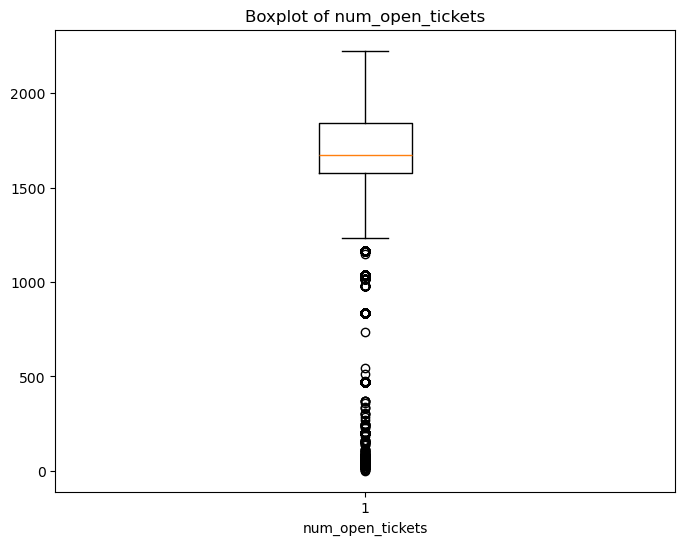

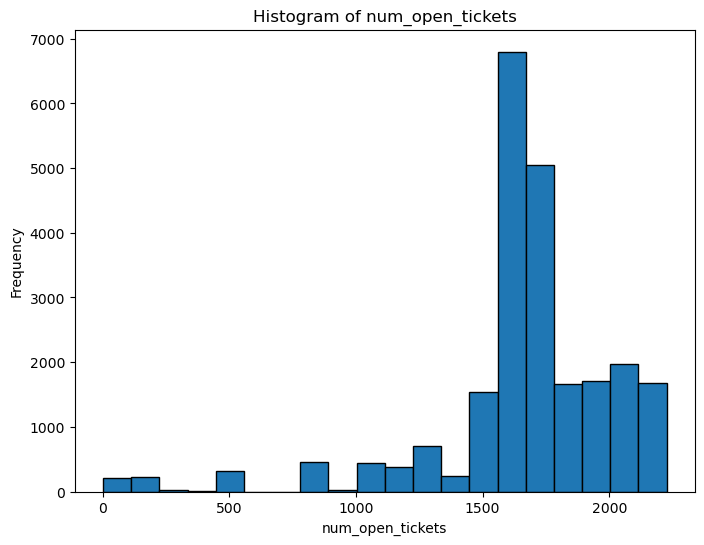

In [167]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_new['num_open_tickets'])
plt.title('Boxplot of num_open_tickets')
plt.xlabel('num_open_tickets')
plt.show()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_new['num_open_tickets'], bins=20, edgecolor='black')
plt.title('Histogram of num_open_tickets')
plt.xlabel('num_open_tickets')
plt.ylabel('Frequency')
plt.show()

In [168]:
df_new.to_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Final 5.xlsx")

In [70]:
df = df.drop(["Customer Satisfaction Rating","Resolution","Date of Purchase","Product Purchased","Customer Gender","Customer Age","Customer Name"], axis=1)
df


KeyError: "['Customer Satisfaction Rating', 'Resolution', 'Date of Purchase', 'Product Purchased', 'Customer Gender', 'Customer Age', 'Customer Name'] not found in axis"

In [71]:
df = df.drop(["Customer Satisfaction Rating","Resolution","Date of Purchase","Product Purchased","Customer Gender","Customer Age","Customer Name"], axis=1)
df

KeyError: "['Customer Satisfaction Rating', 'Resolution', 'Date of Purchase', 'Product Purchased', 'Customer Gender', 'Customer Age', 'Customer Name'] not found in axis"

In [69]:
df = df.drop(["Customer Satisfaction Rating","Resolution","Date of Purchase","Product Purchased","Customer Gender","Customer Age","Customer Name"], axis=1)
df

,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
2,3,gonzalestracy@example.com,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,6/1/2023 11:14,6/1/2023 18:05
3,4,bradleyolson@example.org,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,6/1/2023 7:29,6/1/2023 1:57
4,5,bradleymark@example.com,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,6/1/2023 0:12,6/1/2023 19:53
10,11,mbrown@example.org,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,6/1/2023 17:46,5/31/2023 23:51
11,12,davisjohn@example.net,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,6/1/2023 12:05,6/1/2023 9:27
...,...,...,...,...,...,...,...,...,...,...
8454,8453,jessica60@example.org,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Critical,Phone,6/1/2023 14:14,6/1/2023 5:47
8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,High,Chat,6/1/2023 12:56,6/1/2023 4:45
8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,High,Email,6/1/2023 14:15,6/1/2023 6:58
8468,8467,ashley83@example.org,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,Social media,6/1/2023 9:44,6/1/2023 4:31


In [72]:
df = pd.read_csv("D:\\Private\\University\\Research\Data Sets\\customer_support_tickets.csv")
df


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,3/22/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,6/1/2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,5/22/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,6/1/2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,7/14/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,6/1/2023 11:14,6/1/2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,11/13/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,6/1/2023 7:29,6/1/2023 1:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2/4/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,6/1/2023 0:12,6/1/2023 19:53,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8466,8465,David Todd,adam28@example.net,22,Female,LG OLED,12/8/2021,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8467,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2/22/2020,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8468,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,8/17/2021,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,6/1/2023 9:44,6/1/2023 4:31,3.0
8469,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,10/16/2021,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,6/1/2023 18:28,6/1/2023 5:32,3.0


In [73]:
df = df.drop(["Customer Satisfaction Rating","Resolution","Date of Purchase","Product Purchased","Customer Gender","Customer Age","Customer Name"], axis=1)
df

,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,1,carrollallison@example.com,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,6/1/2023 12:15,NaN
1,2,clarkeashley@example.com,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,6/1/2023 16:45,NaN
2,3,gonzalestracy@example.com,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,6/1/2023 11:14,6/1/2023 18:05
3,4,bradleyolson@example.org,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,6/1/2023 7:29,6/1/2023 1:57
4,5,bradleymark@example.com,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,6/1/2023 0:12,6/1/2023 19:53
...,...,...,...,...,...,...,...,...,...,...
8466,8465,adam28@example.net,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Low,Phone,NaN,NaN
8467,8466,russell68@example.com,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Critical,Email,NaN,NaN
8468,8467,ashley83@example.org,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,Social media,6/1/2023 9:44,6/1/2023 4:31
8469,8468,fpowell@example.org,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,Medium,Email,6/1/2023 18:28,6/1/2023 5:32


In [75]:
df_new = df.dropna()
df_new


,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
2,3,gonzalestracy@example.com,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,6/1/2023 11:14,6/1/2023 18:05
3,4,bradleyolson@example.org,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,6/1/2023 7:29,6/1/2023 1:57
4,5,bradleymark@example.com,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,6/1/2023 0:12,6/1/2023 19:53
10,11,mbrown@example.org,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,6/1/2023 17:46,5/31/2023 23:51
11,12,davisjohn@example.net,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,6/1/2023 12:05,6/1/2023 9:27
...,...,...,...,...,...,...,...,...,...,...
8454,8453,jessica60@example.org,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Critical,Phone,6/1/2023 14:14,6/1/2023 5:47
8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,High,Chat,6/1/2023 12:56,6/1/2023 4:45
8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,High,Email,6/1/2023 14:15,6/1/2023 6:58
8468,8467,ashley83@example.org,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,Social media,6/1/2023 9:44,6/1/2023 4:31


In [76]:
df_new['First Response Time'] = pd.to_datetime(df_new['First Response Time'], format='%d/%m/%Y', errors='coerce')
df_new

C:\Users\HP\AppData\Local\Temp\ipykernel_16064\627213678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['First Response Time'] = pd.to_datetime(df_new['First Response Time'], format='%d/%m/%Y', errors='coerce')


,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
2,3,gonzalestracy@example.com,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,NaT,6/1/2023 18:05
3,4,bradleyolson@example.org,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,NaT,6/1/2023 1:57
4,5,bradleymark@example.com,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,NaT,6/1/2023 19:53
10,11,mbrown@example.org,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,NaT,5/31/2023 23:51
11,12,davisjohn@example.net,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,NaT,6/1/2023 9:27
...,...,...,...,...,...,...,...,...,...,...
8454,8453,jessica60@example.org,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Critical,Phone,NaT,6/1/2023 5:47
8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,High,Chat,NaT,6/1/2023 4:45
8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,High,Email,NaT,6/1/2023 6:58
8468,8467,ashley83@example.org,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,Social media,NaT,6/1/2023 4:31


In [77]:
df_new = df.dropna()
df_new

,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
2,3,gonzalestracy@example.com,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,6/1/2023 11:14,6/1/2023 18:05
3,4,bradleyolson@example.org,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,6/1/2023 7:29,6/1/2023 1:57
4,5,bradleymark@example.com,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,6/1/2023 0:12,6/1/2023 19:53
10,11,mbrown@example.org,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,6/1/2023 17:46,5/31/2023 23:51
11,12,davisjohn@example.net,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,6/1/2023 12:05,6/1/2023 9:27
...,...,...,...,...,...,...,...,...,...,...
8454,8453,jessica60@example.org,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Critical,Phone,6/1/2023 14:14,6/1/2023 5:47
8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,High,Chat,6/1/2023 12:56,6/1/2023 4:45
8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,High,Email,6/1/2023 14:15,6/1/2023 6:58
8468,8467,ashley83@example.org,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,Social media,6/1/2023 9:44,6/1/2023 4:31


In [78]:
df_new.str.split(" ")

AttributeError: 'DataFrame' object has no attribute 'str'

In [79]:
df_new["First Response Time"].str.split(" ")

2       [6/1/2023, 11:14]
3        [6/1/2023, 7:29]
4        [6/1/2023, 0:12]
10      [6/1/2023, 17:46]
11      [6/1/2023, 12:05]
              ...        
8454    [6/1/2023, 14:14]
8455    [6/1/2023, 12:56]
8457    [6/1/2023, 14:15]
8468     [6/1/2023, 9:44]
8469    [6/1/2023, 18:28]
Name: First Response Time, Length: 2768, dtype: object

In [80]:
df_new["First Response Time"].str.split(" ").str[0]

2       6/1/2023
3       6/1/2023
4       6/1/2023
10      6/1/2023
11      6/1/2023
          ...   
8454    6/1/2023
8455    6/1/2023
8457    6/1/2023
8468    6/1/2023
8469    6/1/2023
Name: First Response Time, Length: 2768, dtype: object

In [81]:
df_new["First Response Time"] = df_new["First Response Time"].str.split(" ").str[0]

C:\Users\HP\AppData\Local\Temp\ipykernel_16064\2532740058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["First Response Time"] = df_new["First Response Time"].str.split(" ").str[0]


In [82]:
df_new

,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
2,3,gonzalestracy@example.com,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,6/1/2023,6/1/2023 18:05
3,4,bradleyolson@example.org,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,6/1/2023,6/1/2023 1:57
4,5,bradleymark@example.com,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,6/1/2023,6/1/2023 19:53
10,11,mbrown@example.org,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,6/1/2023,5/31/2023 23:51
11,12,davisjohn@example.net,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,6/1/2023,6/1/2023 9:27
...,...,...,...,...,...,...,...,...,...,...
8454,8453,jessica60@example.org,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Critical,Phone,6/1/2023,6/1/2023 5:47
8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,High,Chat,6/1/2023,6/1/2023 4:45
8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,High,Email,6/1/2023,6/1/2023 6:58
8468,8467,ashley83@example.org,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,Social media,6/1/2023,6/1/2023 4:31


In [83]:
df_new["Time to Resolution"] = df_new["Time to Resolution"].str.split(" ").str[0]
df_new

C:\Users\HP\AppData\Local\Temp\ipykernel_16064\159552620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Time to Resolution"] = df_new["Time to Resolution"].str.split(" ").str[0]


,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
2,3,gonzalestracy@example.com,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,6/1/2023,6/1/2023
3,4,bradleyolson@example.org,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,6/1/2023,6/1/2023
4,5,bradleymark@example.com,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,6/1/2023,6/1/2023
10,11,mbrown@example.org,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,6/1/2023,5/31/2023
11,12,davisjohn@example.net,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...
8454,8453,jessica60@example.org,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Critical,Phone,6/1/2023,6/1/2023
8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,High,Chat,6/1/2023,6/1/2023
8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,High,Email,6/1/2023,6/1/2023
8468,8467,ashley83@example.org,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,Social media,6/1/2023,6/1/2023


In [84]:
df_new = df_new.dropna()
df_new

,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
2,3,gonzalestracy@example.com,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,6/1/2023,6/1/2023
3,4,bradleyolson@example.org,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,6/1/2023,6/1/2023
4,5,bradleymark@example.com,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,6/1/2023,6/1/2023
10,11,mbrown@example.org,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,6/1/2023,5/31/2023
11,12,davisjohn@example.net,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...
8454,8453,jessica60@example.org,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Critical,Phone,6/1/2023,6/1/2023
8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,High,Chat,6/1/2023,6/1/2023
8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,High,Email,6/1/2023,6/1/2023
8468,8467,ashley83@example.org,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,High,Social media,6/1/2023,6/1/2023


In [85]:
df_new['Ticket Description'].str.replace(r'{product_purchased}', '')

2       I'm facing a problem with my . The  is not tur...
3       I'm having an issue with the . Please assist.\...
4       I'm having an issue with the . Please assist.\...
10      I'm having an issue with the . Please assist. ...
11      I'm having an issue with the . Please assist.\...
                              ...                        
8454    I'm having an issue with the . Please assist.\...
8455    The  is unable to establish a stable internet ...
8457    I've recently set up my , but it fails to conn...
8468    I'm having an issue with the . Please assist. ...
8469    I'm having an issue with the . Please assist. ...
Name: Ticket Description, Length: 2768, dtype: object

In [86]:
df_new["Ticket Description"] = df_new['Ticket Description'].str.replace(r'{product_purchased}', '')

In [87]:
df_new

,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
2,3,gonzalestracy@example.com,Technical issue,Network problem,I'm facing a problem with my . The is not tur...,Closed,Low,Social media,6/1/2023,6/1/2023
3,4,bradleyolson@example.org,Billing inquiry,Account access,I'm having an issue with the . Please assist.\...,Closed,Low,Social media,6/1/2023,6/1/2023
4,5,bradleymark@example.com,Billing inquiry,Data loss,I'm having an issue with the . Please assist.\...,Closed,Low,Email,6/1/2023,6/1/2023
10,11,mbrown@example.org,Cancellation request,Data loss,I'm having an issue with the . Please assist. ...,Closed,High,Phone,6/1/2023,5/31/2023
11,12,davisjohn@example.net,Product inquiry,Software bug,I'm having an issue with the . Please assist.\...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...
8454,8453,jessica60@example.org,Refund request,Display issue,I'm having an issue with the . Please assist.\...,Closed,Critical,Phone,6/1/2023,6/1/2023
8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The is unable to establish a stable internet ...,Closed,High,Chat,6/1/2023,6/1/2023
8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"I've recently set up my , but it fails to conn...",Closed,High,Email,6/1/2023,6/1/2023
8468,8467,ashley83@example.org,Technical issue,Account access,I'm having an issue with the . Please assist. ...,Closed,High,Social media,6/1/2023,6/1/2023


In [88]:
df_new['Ticket Description'].str.replace('[{}]'.format(string.punctuation), '')

NameError: name 'string' is not defined

In [90]:
df_new['Ticket Description'].str.replace('[{}]'.format(string.punctuation), '')

2       I'm facing a problem with my . The  is not tur...
3       I'm having an issue with the . Please assist.\...
4       I'm having an issue with the . Please assist.\...
10      I'm having an issue with the . Please assist. ...
11      I'm having an issue with the . Please assist.\...
                              ...                        
8454    I'm having an issue with the . Please assist.\...
8455    The  is unable to establish a stable internet ...
8457    I've recently set up my , but it fails to conn...
8468    I'm having an issue with the . Please assist. ...
8469    I'm having an issue with the . Please assist. ...
Name: Ticket Description, Length: 2768, dtype: object

In [91]:
df_new['Ticket Description'].str.replace('[{}\\s]'.format(string.punctuation), '')

2       I'm facing a problem with my . The  is not tur...
3       I'm having an issue with the . Please assist.\...
4       I'm having an issue with the . Please assist.\...
10      I'm having an issue with the . Please assist. ...
11      I'm having an issue with the . Please assist.\...
                              ...                        
8454    I'm having an issue with the . Please assist.\...
8455    The  is unable to establish a stable internet ...
8457    I've recently set up my , but it fails to conn...
8468    I'm having an issue with the . Please assist. ...
8469    I'm having an issue with the . Please assist. ...
Name: Ticket Description, Length: 2768, dtype: object

In [93]:
df_new['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

KeyError: 'Text'

In [94]:
df_new['Ticket Description'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

2       Im facing a problem with my  The  is not turni...
3       Im having an issue with the  Please assist\n\n...
4       Im having an issue with the  Please assist\n\n...
10      Im having an issue with the  Please assist 180...
11      Im having an issue with the  Please assist\n\n...
                              ...                        
8454    Im having an issue with the  Please assist\n\n...
8455    The  is unable to establish a stable internet ...
8457    Ive recently set up my  but it fails to connec...
8468    Im having an issue with the  Please assist You...
8469    Im having an issue with the  Please assist I d...
Name: Ticket Description, Length: 2768, dtype: object

In [95]:
df_new["Ticket Description"] = df_new['Ticket Description'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df_new

,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
2,3,gonzalestracy@example.com,Technical issue,Network problem,Im facing a problem with my The is not turni...,Closed,Low,Social media,6/1/2023,6/1/2023
3,4,bradleyolson@example.org,Billing inquiry,Account access,Im having an issue with the Please assist\n\n...,Closed,Low,Social media,6/1/2023,6/1/2023
4,5,bradleymark@example.com,Billing inquiry,Data loss,Im having an issue with the Please assist\n\n...,Closed,Low,Email,6/1/2023,6/1/2023
10,11,mbrown@example.org,Cancellation request,Data loss,Im having an issue with the Please assist 180...,Closed,High,Phone,6/1/2023,5/31/2023
11,12,davisjohn@example.net,Product inquiry,Software bug,Im having an issue with the Please assist\n\n...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...
8454,8453,jessica60@example.org,Refund request,Display issue,Im having an issue with the Please assist\n\n...,Closed,Critical,Phone,6/1/2023,6/1/2023
8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The is unable to establish a stable internet ...,Closed,High,Chat,6/1/2023,6/1/2023
8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,Ive recently set up my but it fails to connec...,Closed,High,Email,6/1/2023,6/1/2023
8468,8467,ashley83@example.org,Technical issue,Account access,Im having an issue with the Please assist You...,Closed,High,Social media,6/1/2023,6/1/2023


In [96]:
df_new.to_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Test 3 Cleaned.xlsx")

In [97]:
df_new["Customer Email"].unique()

array(['gonzalestracy@example.com', 'bradleyolson@example.org',
       'bradleymark@example.com', ..., 'thompsonsamuel@example.org',
       'ashley83@example.org', 'fpowell@example.org'], dtype=object)

In [98]:
df_new["Customer Email"].value_count()

AttributeError: 'Series' object has no attribute 'value_count'

In [99]:
df_new["Customer Email"].value_counts()

Customer Email
asmith@example.com           3
ggarcia@example.org          2
bmiller@example.org          2
wlee@example.net             2
kmoore@example.net           2
                            ..
jedwards@example.org         1
jamesthompson@example.net    1
tylerreynolds@example.org    1
wrightbrandon@example.com    1
fpowell@example.org          1
Name: count, Length: 2748, dtype: int64

In [101]:
df_new["Customer Email"].value_counts()

Customer Email
asmith@example.com                 3
ggarcia@example.org                2
bmiller@example.org                2
wlee@example.net                   2
kmoore@example.net                 2
jennifer22@example.net             2
daniellebrown@example.net          2
bthompson@example.com              2
jdavis@example.org                 2
robert12@example.com               2
hflynn@example.net                 2
jharris@example.net                2
ogarcia@example.net                2
tbrown@example.net                 2
jbrown@example.com                 2
jessica01@example.com              2
johnsonlisa@example.com            2
tbutler@example.net                2
david60@example.org                2
stacy05@example.net                1
villanuevaedwin@example.org        1
lwest@example.net                  1
noahpaul@example.net               1
caseybecker@example.com            1
brian47@example.net                1
xwatson@example.com                1
armstrongerika@example.

In [102]:
df_new["Customer Email"].value_counts()

Customer Email
asmith@example.com                 3
ggarcia@example.org                2
bmiller@example.org                2
wlee@example.net                   2
kmoore@example.net                 2
jennifer22@example.net             2
daniellebrown@example.net          2
bthompson@example.com              2
jdavis@example.org                 2
robert12@example.com               2
hflynn@example.net                 2
jharris@example.net                2
ogarcia@example.net                2
tbrown@example.net                 2
jbrown@example.com                 2
jessica01@example.com              2
johnsonlisa@example.com            2
tbutler@example.net                2
david60@example.org                2
stacy05@example.net                1
villanuevaedwin@example.org        1
lwest@example.net                  1
noahpaul@example.net               1
caseybecker@example.com            1
brian47@example.net                1
xwatson@example.com                1
armstrongerika@example.

In [ ]:
df_new["Customer Email"].value_counts()

In [ ]:
df_new

In [ ]:
print(df)

In [108]:
df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Test 3 Cleaned.xlsx")

In [109]:
pd.reset_option('display.max_rows')

In [45]:
df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Test 3 Cleaned.xlsx")

In [1]:
df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Test 3 Cleaned.xlsx")
df

NameError: name 'pd' is not defined

In [3]:
df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Test 3 Cleaned.xlsx")
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,Im facing a problem with my The is not turni...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,Im having an issue with the Please assist\n\n...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,Im having an issue with the Please assist\n\n...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,Im having an issue with the Please assist 180...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,Im having an issue with the Please assist\n\n...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,Im having an issue with the Please assist\n\n...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The is unable to establish a stable internet ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,Ive recently set up my but it fails to connec...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,Im having an issue with the Please assist You...,Closed,High,Social media,6/1/2023,6/1/2023


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,Im facing a problem with my The is not turni...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,Im having an issue with the Please assist\n\n...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,Im having an issue with the Please assist\n\n...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,Im having an issue with the Please assist 180...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,Im having an issue with the Please assist\n\n...,Closed,High,Chat,6/1/2023,6/1/2023
5,14,15,medinasteven@example.net,Billing inquiry,Product setup,Im having an issue with the Please assist\n\n...,Closed,High,Chat,6/1/2023,5/31/2023
6,16,17,watkinsbarbara@example.com,Product inquiry,Account access,Im having an issue with the Please assist\n\n...,Closed,Critical,Chat,6/1/2023,6/1/2023
7,19,20,jameslopez@example.com,Refund request,Software bug,Im having an issue with the Please assist\n\n...,Closed,Low,Chat,6/1/2023,6/1/2023
8,28,29,garciastacy@example.com,Technical issue,Product recommendation,Im having an issue with the Please assist Tha...,Closed,Critical,Phone,5/31/2023,6/1/2023
9,29,30,shericase@example.net,Cancellation request,Cancellation request,Im having an issue with the Please assist Its...,Closed,Medium,Phone,6/1/2023,6/1/2023


In [6]:
df["Customer Email"].value_counts()

Customer Email
asmith@example.com                 3
ggarcia@example.org                2
bmiller@example.org                2
wlee@example.net                   2
kmoore@example.net                 2
jennifer22@example.net             2
daniellebrown@example.net          2
bthompson@example.com              2
jdavis@example.org                 2
robert12@example.com               2
hflynn@example.net                 2
jharris@example.net                2
ogarcia@example.net                2
tbrown@example.net                 2
jbrown@example.com                 2
jessica01@example.com              2
johnsonlisa@example.com            2
tbutler@example.net                2
david60@example.org                2
stacy05@example.net                1
villanuevaedwin@example.org        1
lwest@example.net                  1
noahpaul@example.net               1
caseybecker@example.com            1
brian47@example.net                1
xwatson@example.com                1
armstrongerika@example.

In [1]:
df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Test 3 Cleaned.xlsx")
df

NameError: name 'pd' is not defined

In [3]:
df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Test 3 Cleaned.xlsx")
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,Im facing a problem with my The is not turni...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,Im having an issue with the Please assist\n\n...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,Im having an issue with the Please assist\n\n...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,Im having an issue with the Please assist 180...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,Im having an issue with the Please assist\n\n...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,Im having an issue with the Please assist\n\n...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The is unable to establish a stable internet ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,Ive recently set up my but it fails to connec...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,Im having an issue with the Please assist You...,Closed,High,Social media,6/1/2023,6/1/2023


In [4]:
df["Ticket Description"] = df["Ticket Description"].str.lower()
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,im facing a problem with my the is not turni...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,im having an issue with the please assist\n\n...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,im having an issue with the please assist\n\n...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,im having an issue with the please assist 180...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,im having an issue with the please assist\n\n...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,im having an issue with the please assist\n\n...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,the is unable to establish a stable internet ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up my but it fails to connec...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,im having an issue with the please assist you...,Closed,High,Social media,6/1/2023,6/1/2023


In [5]:
df["Ticket Description"] = df["Ticket Description"].apply(remove_whitespaces)
df

NameError: name 'remove_whitespaces' is not defined

SyntaxError: expected ':' (2784213070.py, line 1)

In [28]:
def remove_whitespaces(text):
    return " ".join(text.split())

df_new = df
df_new["Ticket Description"] = df_new["Ticket Description"].apply(remove_whitespaces)
df_new

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem not turning on it was working fi...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having sue please asst if haveproblem re inter...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having sue please asst note seller not respons...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having sue please asst product search whats ne...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having sue please asst it possible we cnot fin...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having sue please asst of of ive already conta...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable to establhstable internet connection it...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect to...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having sue please asst usingdifferent browser ...,Closed,High,Social media,6/1/2023,6/1/2023


In [26]:
df = df_new
df_2 = df_new
df


,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem not turning on it was worki...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having sue please asst if haveproblem re ...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having sue please asst note seller not r...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having sue please asst product search wha...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having sue please asst it possible we c...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having sue please asst of of ive a...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable to establhstable internet connection ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having sue please asst usingdifferent br...,Closed,High,Social media,6/1/2023,6/1/2023


In [23]:
df['Ticket Description'] = df['Ticket Description'].str.replace("I'm", "")
df['Ticket Description'] = df['Ticket Description'].str.replace("my", "")
df_2 = df
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem not turning on it was worki...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having sue please asst if haveproblem re ...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having sue please asst note seller not r...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having sue please asst product search wha...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having sue please asst it possible we c...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having sue please asst of of ive a...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable to establhstable internet connection ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having sue please asst usingdifferent br...,Closed,High,Social media,6/1/2023,6/1/2023


In [22]:
df['Ticket Description'] = df['Ticket Description'].str.replace(r"\bim\b", "")
df['Ticket Description'] = df['Ticket Description'].str.replace(r"\bi\b", "")

In [11]:
df['Ticket Description'] = df['Ticket Description'].str.replace("with", "")
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facing a problem the is not turning on it w...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having an issue the please assist if you hav...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having an issue the please assist note the s...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having an issue the please assist 1800799080...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having an issue the please assist 4 it is po...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having an issue the please assist 919 15 of ...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,the is unable to establish a stable internet c...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having an issue the please assist you are us...,Closed,High,Social media,6/1/2023,6/1/2023


In [12]:
df['Ticket Description'] = df['Ticket Description'].str.replace("an", "")
df['Ticket Description'] = df['Ticket Description'].str.replace(" a ", "")
df['Ticket Description'] = df['Ticket Description'].str.replace("the", "")
df['Ticket Description'] = df['Ticket Description'].str.replace("this", "")
df['Ticket Description'] = df['Ticket Description'].str.replace("that", "")
df['Ticket Description'] = df['Ticket Description'].str.replace("there", "")
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem is not turning on it was wor...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having issue please assist if you haveprob...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having issue please assist note seller is...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having issue please assist 18007990808 pro...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having issue please assist 4 it is possibl...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having issue please assist 919 15 of 525 ...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,is unable to establishstable internet connect...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having issue please assist you are usingdi...,Closed,High,Social media,6/1/2023,6/1/2023


In [13]:
df['Ticket Description'] = df['Ticket Description'].str.replace(" i ", "")
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem is not turning on it was wor...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having issue please assist if you haveprob...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having issue please assist note seller is...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having issue please assist 18007990808 pro...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having issue please assist 4 it is possibl...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having issue please assist 919 15 of 525 ...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,is unable to establishstable internet connect...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having issue please assist you are usingdi...,Closed,High,Social media,6/1/2023,6/1/2023


In [14]:
df['Ticket Description'] = df['Ticket Description'].str.replace("you", "")
df['Ticket Description'] = df['Ticket Description'].str.replace("your", "")
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem is not turning on it was wor...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having issue please assist if haveproblem...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having issue please assist note seller is...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having issue please assist 18007990808 pro...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having issue please assist 4 it is possibl...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having issue please assist 919 15 of 525 ...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,is unable to establishstable internet connect...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having issue please assist are usingdiffe...,Closed,High,Social media,6/1/2023,6/1/2023


In [15]:
df['Ticket Description'] = df['Ticket Description'].str.replace("are", "")

In [16]:
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem is not turning on it was wor...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having issue please assist if haveproblem...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having issue please assist note seller is...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having issue please assist 18007990808 pro...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having issue please assist 4 it is possibl...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having issue please assist 919 15 of 525 ...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,is unable to establishstable internet connect...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having issue please assist usingdifferen...,Closed,High,Social media,6/1/2023,6/1/2023


In [17]:
df['Ticket Description'] = df['Ticket Description'].str.replace("is", "")
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem not turning on it was worki...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having sue please asst if haveproblem re ...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having sue please asst note seller not r...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having sue please asst 18007990808 product...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having sue please asst 4 it possible we ...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having sue please asst 919 15 of 525 919 ...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable to establhstable internet connection ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having sue please asst usingdifferent br...,Closed,High,Social media,6/1/2023,6/1/2023


In [18]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df_new = df
df_new['Ticket Description'] = df_new['Ticket Description'].apply(remove_numbers)

In [19]:
df_new


,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem not turning on it was worki...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having sue please asst if haveproblem re ...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having sue please asst note seller not r...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having sue please asst product search wha...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having sue please asst it possible we c...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having sue please asst of of ive a...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable to establhstable internet connection ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having sue please asst usingdifferent br...,Closed,High,Social media,6/1/2023,6/1/2023


In [24]:
df_2

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem not turning on it was worki...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having sue please asst if haveproblem re ...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having sue please asst note seller not r...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having sue please asst product search wha...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having sue please asst it possible we c...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having sue please asst of of ive a...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable to establhstable internet connection ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having sue please asst usingdifferent br...,Closed,High,Social media,6/1/2023,6/1/2023


In [25]:
df_new

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem not turning on it was worki...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having sue please asst if haveproblem re ...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having sue please asst note seller not r...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having sue please asst product search wha...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having sue please asst it possible we c...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having sue please asst of of ive a...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable to establhstable internet connection ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having sue please asst usingdifferent br...,Closed,High,Social media,6/1/2023,6/1/2023


In [27]:
df_2

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,facingproblem not turning on it was worki...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,having sue please asst if haveproblem re ...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,having sue please asst note seller not r...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,having sue please asst product search wha...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,having sue please asst it possible we c...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,having sue please asst of of ive a...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable to establhstable internet connection ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up but it fails to connect t...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,having sue please asst usingdifferent br...,Closed,High,Social media,6/1/2023,6/1/2023


In [29]:
df = pd.read_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Test 3 Cleaned.xlsx")
df


,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,Im facing a problem with my The is not turni...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,Im having an issue with the Please assist\n\n...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,Im having an issue with the Please assist\n\n...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,Im having an issue with the Please assist 180...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,Im having an issue with the Please assist\n\n...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,Im having an issue with the Please assist\n\n...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The is unable to establish a stable internet ...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,Ive recently set up my but it fails to connec...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,Im having an issue with the Please assist You...,Closed,High,Social media,6/1/2023,6/1/2023


In [30]:
def remove_whitespaces(text):
    return " ".join(text.split())

df_new = df
df_new["Ticket Description"] = df_new["Ticket Description"].apply(remove_whitespaces)
df_new

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,Im facing a problem with my The is not turning...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,Im having an issue with the Please assist If y...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,Im having an issue with the Please assist Note...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,Im having an issue with the Please assist 1800...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,Im having an issue with the Please assist 4 It...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,Im having an issue with the Please assist 919 ...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,The is unable to establish a stable internet c...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,Ive recently set up my but it fails to connect...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,Im having an issue with the Please assist You ...,Closed,High,Social media,6/1/2023,6/1/2023


In [31]:
df["Ticket Description"] = df["Ticket Description"].str.lower()


In [32]:
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,im facing a problem with my the is not turning...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,im having an issue with the please assist if y...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,im having an issue with the please assist note...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,im having an issue with the please assist 1800...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,im having an issue with the please assist 4 it...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,im having an issue with the please assist 919 ...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,the is unable to establish a stable internet c...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up my but it fails to connect...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,im having an issue with the please assist you ...,Closed,High,Social media,6/1/2023,6/1/2023


In [33]:
df_new = df

In [34]:
df_new

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,im facing a problem with my the is not turning...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,im having an issue with the please assist if y...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,im having an issue with the please assist note...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,im having an issue with the please assist 1800...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,im having an issue with the please assist 4 it...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,im having an issue with the please assist 919 ...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,the is unable to establish a stable internet c...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive recently set up my but it fails to connect...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,im having an issue with the please assist you ...,Closed,High,Social media,6/1/2023,6/1/2023


In [35]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
df_new["Ticket Description"] = df_new["Ticket Description"].apply(lambda x: word_tokenize(x))
df_new

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,"[im, facing, a, problem, with, my, the, is, no...",Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,"[im, having, an, issue, with, the, please, ass...",Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,"[im, having, an, issue, with, the, please, ass...",Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,"[im, having, an, issue, with, the, please, ass...",Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,"[im, having, an, issue, with, the, please, ass...",Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,"[im, having, an, issue, with, the, please, ass...",Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,"[the, is, unable, to, establish, a, stable, in...",Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"[ive, recently, set, up, my, but, it, fails, t...",Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,"[im, having, an, issue, with, the, please, ass...",Closed,High,Social media,6/1/2023,6/1/2023


In [36]:
custom_stopwords = "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",

In [37]:
custom_stopwords

('0o',
 '0s',
 '3a',
 '3b',
 '3d',
 '6b',
 '6o',
 'a',
 'a1',
 'a2',
 'a3',
 'a4',
 'ab',
 'able',
 'about',
 'above',
 'abst',
 'ac',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'ad',
 'added',
 'adj',
 'ae',
 'af',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'ag',
 'again',
 'against',
 'ah',
 'ain',
 "ain't",
 'aj',
 'al',
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'ao',
 'ap',
 'apart',
 'apparently',
 'appear',
 'appreciate',
 'appropriate',
 'approximately',
 'ar',
 'are',
 'aren',
 'arent',
 "aren't",
 'arise',
 'around',
 'as',
 "a's",
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'au',
 'auth',
 'av',
 'available',
 'aw',
 'away',
 'awfully',
 'ax',
 'ay',
 'az',

In [38]:
print(type(custom_stopwords))

<class 'tuple'>


In [39]:
x = 'across'
if x in custom_stopwords :
    true
else: 
    false

NameError: name 'true' is not defined

In [40]:
x = 'across'
if x in custom_stopwords :
    print(True)
else: 
    print(False)

True


In [41]:
x = 'mighty'
if x in custom_stopwords :
    print(True)
else: 
    print(False)

False


In [42]:
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords and token not in custom_stopwords
        result.append(token)
        
    return result

df_new_2["Ticket Description"] = df_new["Ticket Description"].apply(remove_stopwords)
df_new_2

SyntaxError: expected ':' (993680439.py, line 4)

In [44]:
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords and token not in custom_stopwords:
            result.append(token)
        
    return result

df_new_2["Ticket Description"] = df_new["Ticket Description"].apply(remove_stopwords)
df_new_2

SyntaxError: expected ':' (3848879443.py, line 4)

In [45]:
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords and token not in custom_stopwords:
            result.append(token)
        
    return result

df_new_2["Ticket Description"] = df_new["Ticket Description"].apply(remove_stopwords)
df_new_2

NameError: name 'df_new_2' is not defined

In [46]:
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords and token not in custom_stopwords:
            result.append(token)
        
    return result
 
df_new["Ticket Description"] = df_new["Ticket Description"].apply(remove_stopwords)
df_new

NameError: name 'df_new_2' is not defined

In [47]:
df = df_new
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,"[im, facing, a, problem, with, my, the, is, no...",Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,"[im, having, an, issue, with, the, please, ass...",Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,"[im, having, an, issue, with, the, please, ass...",Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,"[im, having, an, issue, with, the, please, ass...",Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,"[im, having, an, issue, with, the, please, ass...",Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,"[im, having, an, issue, with, the, please, ass...",Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,"[the, is, unable, to, establish, a, stable, in...",Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"[ive, recently, set, up, my, but, it, fails, t...",Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,"[im, having, an, issue, with, the, please, ass...",Closed,High,Social media,6/1/2023,6/1/2023


In [48]:
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords and token not in custom_stopwords:
            result.append(token)
        
    return result
 
df_new["Ticket Description"] = df_new["Ticket Description"].apply(remove_stopwords)
df_new

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,"[facing, problem, turning, working, fine, yest...",Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,"[issue, assist, problem, interested, love, hap...",Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,"[issue, assist, note, seller, responsible, dam...",Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,"[issue, assist, 18007990808, product, search, ...",Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,"[issue, assist, 4, type, text, product, identi...",Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,"[issue, assist, 919, 15, 525, 919, 210, 525, i...",Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,"[unable, establish, stable, internet, connecti...",Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"[ive, set, fails, connect, networks, steps, tr...",Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,"[issue, assist, browser, ive, performed, facto...",Closed,High,Social media,6/1/2023,6/1/2023


In [49]:
df = df_new
df

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,"[facing, problem, turning, working, fine, yest...",Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,"[issue, assist, problem, interested, love, hap...",Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,"[issue, assist, note, seller, responsible, dam...",Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,"[issue, assist, 18007990808, product, search, ...",Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,"[issue, assist, 4, type, text, product, identi...",Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,"[issue, assist, 919, 15, 525, 919, 210, 525, i...",Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,"[unable, establish, stable, internet, connecti...",Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"[ive, set, fails, connect, networks, steps, tr...",Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,"[issue, assist, browser, ive, performed, facto...",Closed,High,Social media,6/1/2023,6/1/2023


In [50]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

def lemmatization(titleselftext):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(titleselftext):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result

df_new['Ticket Description']=df_new['Ticket Description'].apply(lemmatization)
df_new

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,"[face, problem, turn, work, fine, yesterday, d...",Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,"[issue, assist, problem, interested, love, hap...",Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,"[issue, assist, note, seller, responsible, dam...",Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,"[issue, assist, 18007990808, product, search, ...",Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,"[issue, assist, 4, type, text, product, identi...",Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,"[issue, assist, 919, 15, 525, 919, 210, 525, i...",Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,"[unable, establish, stable, internet, connecti...",Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,"[ive, set, fails, connect, network, step, trou...",Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,"[issue, assist, browser, ive, perform, factory...",Closed,High,Social media,6/1/2023,6/1/2023


In [51]:
df = df_new

In [52]:
df_new['Ticket Description']=[' '.join(map(str, l))for l in df_new['Ticket Description']]
df_new

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,face problem turn work fine yesterday doesnt r...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,issue assist problem interested love happen ch...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,issue assist note seller responsible damage ar...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,issue assist 18007990808 product search 2345 r...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,issue assist 4 type text product identify brow...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,issue assist 919 15 525 919 210 525 ive contac...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable establish stable internet connection di...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive set fails connect network step troubleshoo...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,issue assist browser ive perform factory reset...,Closed,High,Social media,6/1/2023,6/1/2023


In [53]:
import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df_new['Ticket Description'] = df_new['Ticket Description'].apply(remove_numbers)
df_new

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,face problem turn work fine yesterday doesnt r...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,issue assist problem interested love happen ch...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,issue assist note seller responsible damage ar...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,issue assist product search report feedback ...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,issue assist type text product identify brown...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,issue assist ive contact customer suppor...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable establish stable internet connection di...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,ive set fails connect network step troubleshoo...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,issue assist browser ive perform factory reset...,Closed,High,Social media,6/1/2023,6/1/2023


In [54]:
def remove_short_words(text):
    pattern = r'\b\w{1,3}\b'
    clean_text = re.sub(pattern, '', text)
    
    return clean_text

df_new['Ticket Description'] = df_new['Ticket Description'].apply(remove_short_words)
df_new

,Unnamed: 0,Ticket ID,Customer Email,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution
0,2,3,gonzalestracy@example.com,Technical issue,Network problem,face problem turn work fine yesterday doesnt r...,Closed,Low,Social media,6/1/2023,6/1/2023
1,3,4,bradleyolson@example.org,Billing inquiry,Account access,issue assist problem interested love happen ch...,Closed,Low,Social media,6/1/2023,6/1/2023
2,4,5,bradleymark@example.com,Billing inquiry,Data loss,issue assist note seller responsible damage ar...,Closed,Low,Email,6/1/2023,6/1/2023
3,10,11,mbrown@example.org,Cancellation request,Data loss,issue assist product search report feedback ...,Closed,High,Phone,6/1/2023,5/31/2023
4,11,12,davisjohn@example.net,Product inquiry,Software bug,issue assist type text product identify brown...,Closed,High,Chat,6/1/2023,6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...
2763,8454,8453,jessica60@example.org,Refund request,Display issue,issue assist contact customer support m...,Closed,Critical,Phone,6/1/2023,6/1/2023
2764,8455,8454,wanderson@example.com,Billing inquiry,Peripheral compatibility,unable establish stable internet connection di...,Closed,High,Chat,6/1/2023,6/1/2023
2765,8457,8456,thompsonsamuel@example.org,Billing inquiry,Refund request,fails connect network step troubleshoot issu...,Closed,High,Email,6/1/2023,6/1/2023
2766,8468,8467,ashley83@example.org,Technical issue,Account access,issue assist browser perform factory reset r...,Closed,High,Social media,6/1/2023,6/1/2023


In [55]:
df_new.to_excel("D:\\Private\\University\\Research\\Data Sets\\Enhanced Data Sets\\Test 3 lemmatized.xlsx")